# Project 2 – Part 2
**Student Name:** Camille Settles  
**Student ID:** @02986989



## 1. Import Libraries

In [3]:
import pandas as pd  # Used to load and manipulate the dataset
import matplotlib.pyplot as plt  # Used to plot visualizations like bar charts and boxplots
import seaborn as sns  # Used to make advanced visualizations like heatmaps and styled plots
sns.set(style='whitegrid')  # Set Seaborn style to whitegrid for better visual readability
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for all plots

## 2. Load Cleaned Dataset and Prepare for Analysis

In [6]:
df = pd.read_csv("Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012_ (1)_cleaned.csv")  # Load cleaned CSV data into a pandas DataFrame
df['School Type'] = df['Elementary, Middle, or High School'].map({  # Replace school type abbreviations with readable names
    'ES': 'Elementary School',
    'MS': 'Middle School',
    'HS': 'High School'
})

df_plot = df.dropna(subset=[  # Create filtered dataset with only rows that have no missing values in selected columns
    'Average Student Attendance',
    'ISAT Value Add Read',
    'ISAT Value Add Math',
    'Family Involvement Score',
    'CPS Performance Policy Level',
    'Rate of Misconducts (per 100 students) ',
    'School Type'
])

df_plot.loc[:, 'CPS Performance Policy Level'] = df_plot['CPS Performance Policy Level'].str.strip()  # Strip whitespace from performance level values for consistency

## 3. Data Understanding and Cleaning Summary (From Part 1)

**Dataset Overview:**
- 79 columns across 500+ schools in Chicago
- Contains test scores, attendance, parent involvement, misconduct rates, and categorical data like school type

**Cleaning Summary:**
1. Mapped abbreviations for school type (ES, MS, HS) to full labels
2. Dropped rows with missing data in important columns using `.dropna()`
3. Stripped whitespace from categorical strings (like policy levels)
4. Focused on relevant columns only — e.g., excluded phone numbers and URLs
5. Verified numerical data types for attendance, test scores, etc., were correct

### Boxplot – Student Attendance by School Type

**Explain: What does this visualization reveal about the distribution or spread of values?**

This visualization shows that **attendance becomes more variable and lower in later grade levels**, suggesting possible disengagement or external factors impacting older students.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/var/folders/dt/20ztpkzj75b_gbw5bm9hzh7m0000gn/T/ipykernel_18386/796225646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='School Type', y='Average Student Attendance', palette=palette)  # Plot a boxplot showing attendance distribution by school type


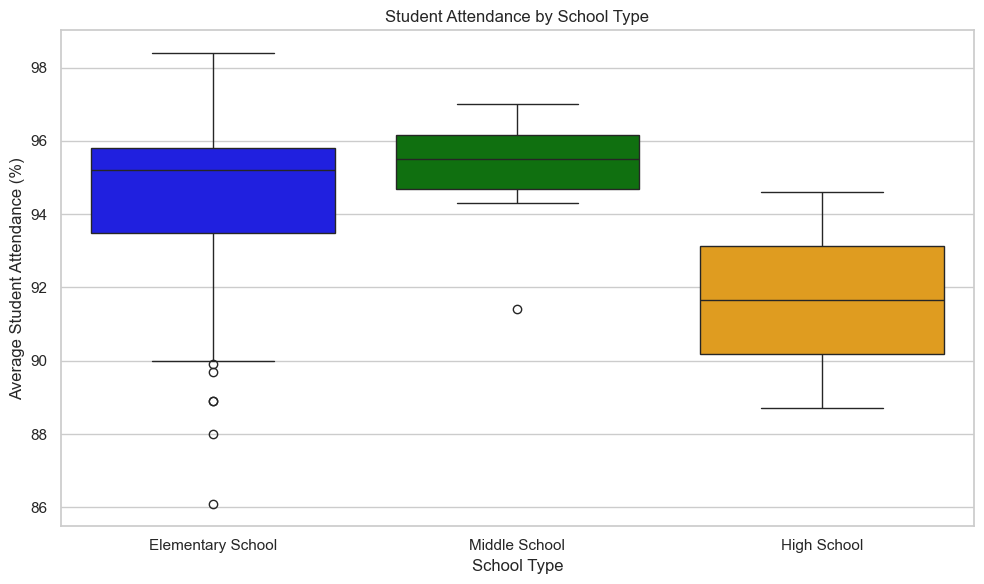

In [29]:
palette = {
    'Elementary School': 'blue',
    'Middle School': 'green',
    'High School': 'orange'
}  # Define a color palette for consistent visuals
sns.boxplot(data=df_plot, x='School Type', y='Average Student Attendance', palette=palette)  # Plot a boxplot showing attendance distribution by school type
plt.title('Student Attendance by School Type')  # Add title to the plot
plt.xlabel('School Type')  # X-axis label
plt.ylabel('Average Student Attendance (%)')  # Y-axis label
plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot

This boxplot reveals the distribution of average student attendance rates across school types.

- Elementary and middle schools have a **higher median** and **tighter interquartile range (IQR)** — meaning attendance is both high and consistent.
- High schools show a **wider spread**, with many schools falling well below 90%, and more **outliers**.
  
This visualization shows that **attendance becomes more variable and lower in later grade levels**, suggesting possible disengagement or external factors impacting older students.

### Bar Chart – Average Family Involvement Score by School Type

**Explain: What does this visualization reveal about the distribution or spread of values?**

This bar chart compares the average family involvement across school types. High schools have the highest average score, followed by elementary, then middle schools. The chart does not show internal spread but allows clear comparison of average scores.

/var/folders/dt/20ztpkzj75b_gbw5bm9hzh7m0000gn/T/ipykernel_18386/1449707709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_fam, x='School Type', y='Family Involvement Score', palette=palette)  # Plot bar chart of average involvement


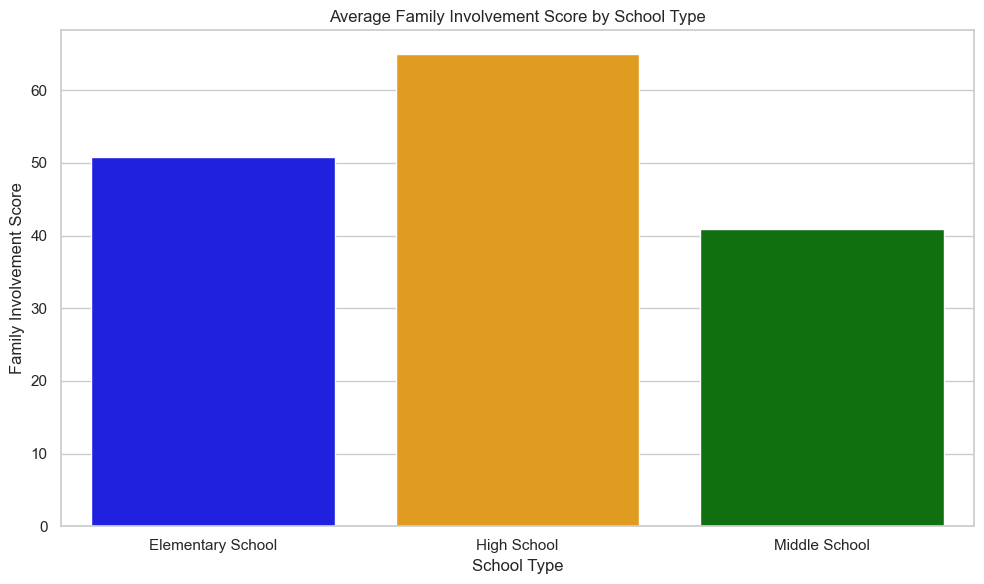

In [33]:
grouped_fam = df_plot.groupby('School Type')['Family Involvement Score'].mean().reset_index()  # Group by school type and calculate average involvement
sns.barplot(data=grouped_fam, x='School Type', y='Family Involvement Score', palette=palette)  # Plot bar chart of average involvement
plt.title('Average Family Involvement Score by School Type')
plt.xlabel('School Type')
plt.ylabel('Family Involvement Score')
plt.tight_layout()
plt.show()

This chart displays the **average family involvement score** across school types.

- High schools show the **highest** average involvement.
- Middle schools have the **lowest** levels of reported family involvement.
- Elementary schools fall in between.

This dataset suggests that **high schools report stronger family engagement**, possibly due to efforts tied to graduation, college readiness, or targeted parent programs.  
This bar chart compares averages and does not show how the values are distributed within each school type.

### Count Plot – Number of Schools by School Type

**Explain: What does this visualization reveal about the distribution or spread of values?**

This plot reveals that the dataset is overwhelmingly made up of elementary schools, with very few middle and high schools. This uneven distribution means results are heavily skewed toward elementary schools.

/var/folders/dt/20ztpkzj75b_gbw5bm9hzh7m0000gn/T/ipykernel_18386/3219708513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='School Type', palette=palette)  # Plot count of schools in each type


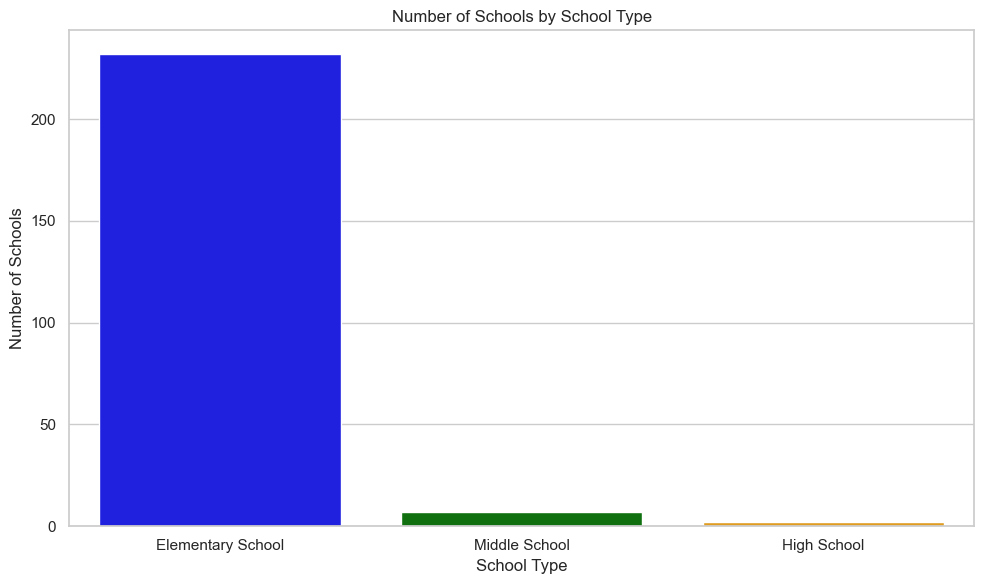

In [37]:
sns.countplot(data=df_plot, x='School Type', palette=palette)  # Plot count of schools in each type
plt.title('Number of Schools by School Type')
plt.xlabel('School Type') # Label x axis
plt.ylabel('Number of Schools') # Label y axis
plt.tight_layout()
plt.show()

This count plot shows how many schools of each type are represented in the dataset.

- Elementary schools dominate the dataset with **232 schools**.
- Middle schools are rare, with only **7 schools**.
- High schools are the least represented, with just **2 schools**.

This shows an extremely **uneven distribution**, with most data coming from elementary schools.  
It’s important to remember this imbalance when comparing averages because high and middle schools are underrepresented; their trends may not be as statistically reliable.

### Grouped Bar Plot – Average Student Misconduct by CPS Performance Policy Level

**Explain: What does this visualization reveal about the distribution or spread of values?**

This bar chart shows average misconduct per 100 students by CPS performance level. Level 3 schools have the highest average misconduct, indicating a trend where poor performance aligns with more behavior issues.

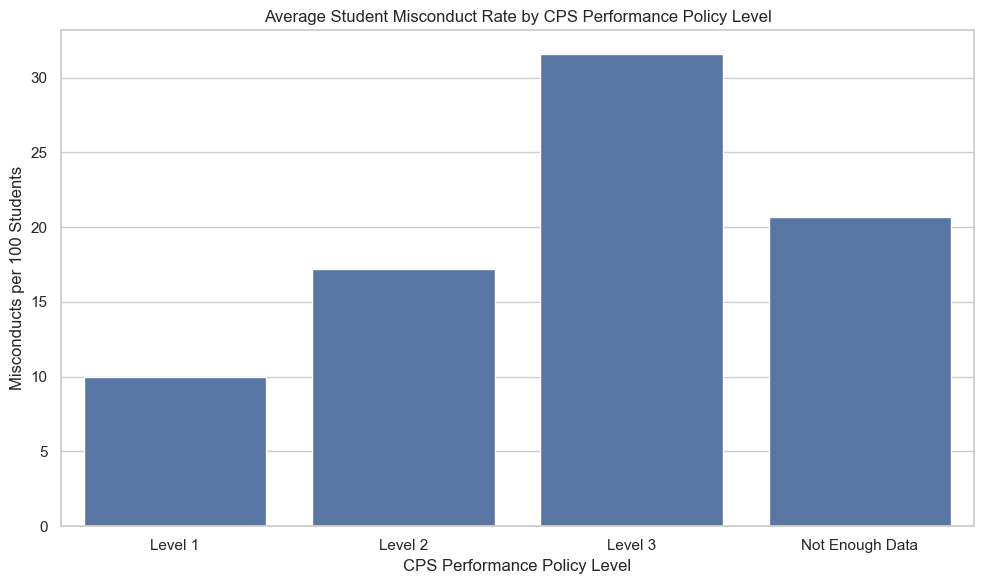

In [41]:
misconduct = df_plot.groupby('CPS Performance Policy Level')['Rate of Misconducts (per 100 students) '].mean().reset_index()  # Calculate avg misconduct by performance level
sns.barplot(data=misconduct, x='CPS Performance Policy Level', y='Rate of Misconducts (per 100 students) ')  # Plot bar chart
plt.title('Average Student Misconduct Rate by CPS Performance Policy Level')
plt.xlabel('CPS Performance Policy Level')
plt.ylabel('Misconducts per 100 Students')
plt.tight_layout()
plt.show()

This chart compares the **average misconduct rate** across CPS performance levels.

- Level 3 schools (lowest-performing) have the **highest misconduct**.
- Level 1 schools (highest-performing) have the **lowest**.
- Level 2 is in the middle.

While it shows averages, this plot reveals a clear **pattern in student behavior**: schools with better performance tend to have fewer discipline issues, while underperforming schools experience more.


### Scatter Plot – ISAT Math Growth vs. Reading Growth

**Explain: Do you observe trends, correlations, or outliers?**

There is a strong positive correlation between reading and math growth. Schools with high reading gains also tend to score well in math. Elementary schools are more tightly grouped, high schools more spread out.

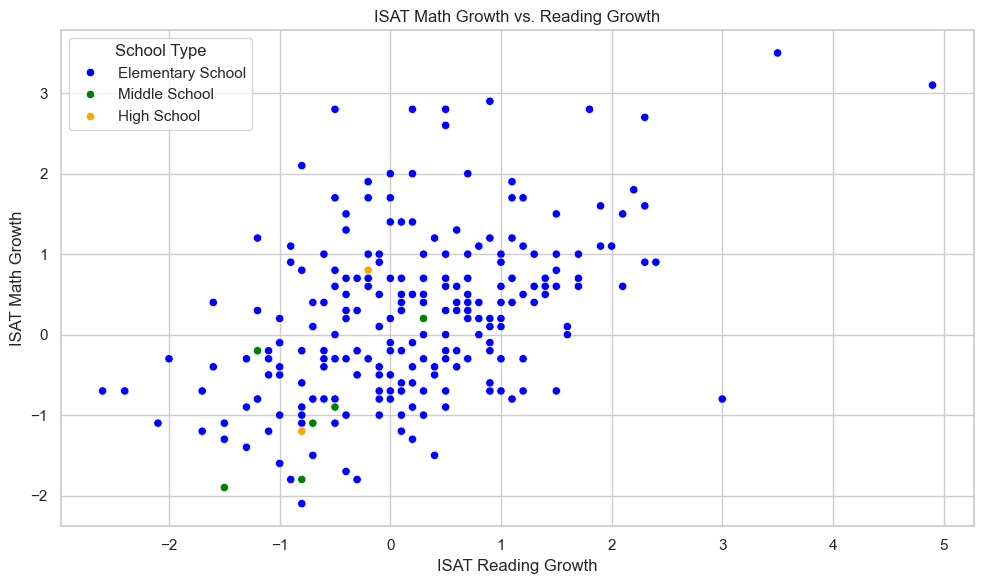

In [45]:
sns.scatterplot(data=df_plot, x='ISAT Value Add Read', y='ISAT Value Add Math', hue='School Type', palette=palette)  # Plot reading vs math growth
plt.title('ISAT Math Growth vs. Reading Growth')
plt.xlabel('ISAT Reading Growth')
plt.ylabel('ISAT Math Growth')
plt.legend(title='School Type')
plt.tight_layout()
plt.show()


This scatter plot explores the relationship between ISAT reading and math growth.

- There's a **positive correlation**: higher reading growth often aligns with higher math growth.
- Elementary schools appear more clustered, while high schools show more spread.

This reveals a **strong alignment between subject performance**, and that **growth variability increases in higher grades**.

### Heatmap – Correlation Between Attendance and Growth

**Explain: Do you observe trends, correlations, or outliers?**

Yes, attendance is positively correlated with both reading and math growth. These findings suggest that higher attendance improves academic performance.

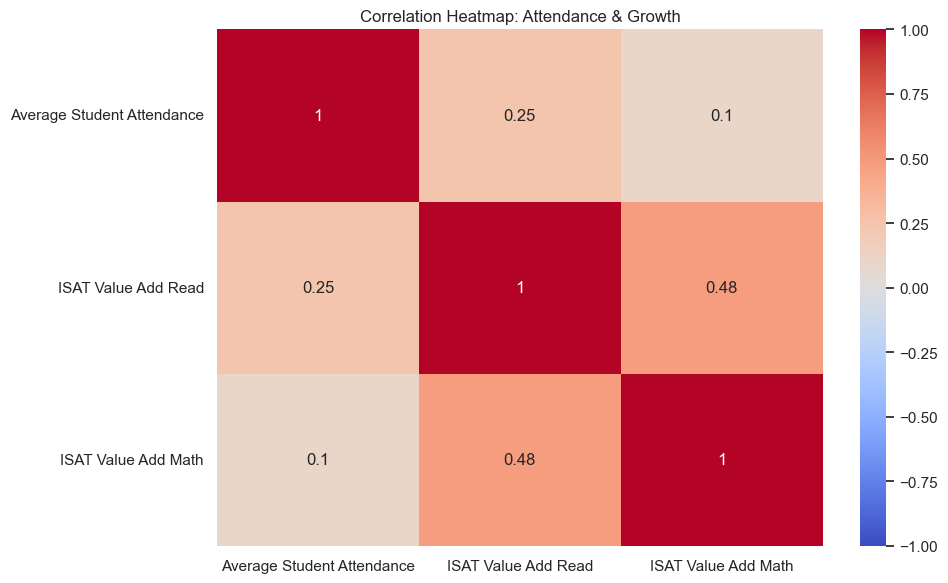

In [49]:
corr = df_plot[['Average Student Attendance', 'ISAT Value Add Read', 'ISAT Value Add Math']].corr()  # Calculate correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Plot heatmap of correlations
plt.title('Correlation Heatmap: Attendance & Growth')
plt.tight_layout()
plt.show()

This heatmap summarizes the linear relationships between attendance and academic growth metrics.

- Attendance is **moderately correlated** with both reading and math growth.
- Reading and math growth are also strongly correlated with each other.

This reveals that **higher attendance is associated with better academic outcomes**, and that performance in one subject often reflects performance in another.